In [1]:
from emoinvest.stock_data_importer.stock_import import get_single_stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision=2)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from datetime import date

%matplotlib inline

height has been deprecated.



In [2]:
df = get_single_stock('MSFT', '2017-01-01', date.today())
df.head()

,high,low,open,close,volume,adj_close,ticker_symbol
Date,,,,,,,
2017-01-03,62.840,62.130,62.790,62.580,20694100.000,60.431,MSFT
2017-01-04,62.750,62.120,62.480,62.300,21340000.000,60.161,MSFT
2017-01-05,62.660,62.030,62.190,62.300,24876000.000,60.161,MSFT
2017-01-06,63.150,62.040,62.300,62.840,19922900.000,60.683,MSFT
2017-01-09,63.080,62.540,62.760,62.640,20256600.000,60.489,MSFT


### EMA = exponential moving average
### SMS = simple moving average
### MACD = moving average convergence divergence

In [3]:
df['SMA_12'] = df['close'].rolling(12).mean()
df['SMA_26'] = df['close'].rolling(26).mean()
df['MACD'] = df['SMA_12'] - df['SMA_26']

In [4]:
df['signal'] = df['MACD'].rolling(9).mean()

In [5]:
df.tail(10)

,high,low,open,close,volume,adj_close,ticker_symbol,SMA_12,SMA_26,MACD,signal
Date,,,,,,,,,,,
2018-09-24,114.900,112.220,113.030,114.670,27334500.000,114.670,MSFT,112.197,110.574,1.624,1.367
2018-09-25,115.100,113.750,114.800,114.450,22668000.000,114.450,MSFT,112.717,110.838,1.879,1.435
2018-09-26,115.060,113.740,114.470,113.980,19352000.000,113.980,MSFT,113.101,111.112,1.989,1.501
2018-09-27,114.910,114.200,114.780,114.410,19091300.000,114.410,MSFT,113.365,111.436,1.929,1.549
2018-09-28,114.570,113.680,114.190,114.370,21647800.000,114.370,MSFT,113.587,111.717,1.870,1.599
2018-10-01,115.680,114.730,114.750,115.610,18883100.000,115.610,MSFT,113.812,112.027,1.785,1.647
2018-10-02,115.840,114.440,115.300,115.150,20787200.000,115.150,MSFT,113.960,112.286,1.674,1.703
2018-10-03,116.180,114.930,115.420,115.170,16648000.000,115.170,MSFT,114.213,112.500,1.712,1.762
2018-10-04,114.760,111.630,114.610,112.790,34821700.000,112.790,MSFT,114.178,112.598,1.580,1.782


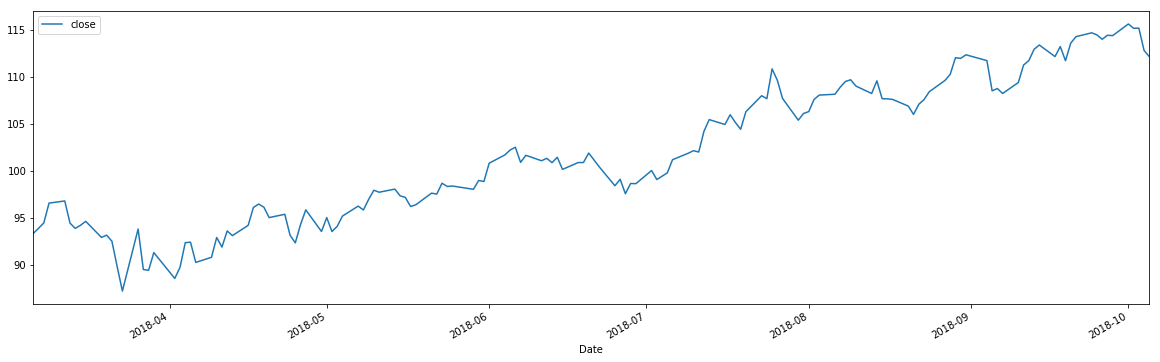

In [6]:
df[['close']].tail(150).plot(figsize=(20,6))

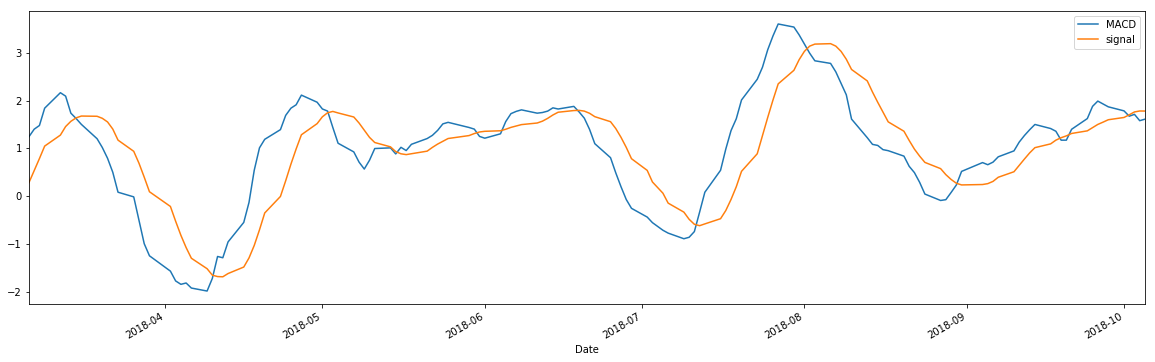

In [7]:
df[['MACD', 'signal']].tail(150).plot(figsize=(20,6))

In [8]:
df['buy_signal'] = 0
df['sell_signal'] = 0
buy_flag = []
sell_flag = []
df.head(5)

,high,low,open,close,volume,adj_close,ticker_symbol,SMA_12,SMA_26,MACD,signal,buy_signal,sell_signal
Date,,,,,,,,,,,,,
2017-01-03,62.840,62.130,62.790,62.580,20694100.000,60.431,MSFT,nan,nan,nan,nan,0,0
2017-01-04,62.750,62.120,62.480,62.300,21340000.000,60.161,MSFT,nan,nan,nan,nan,0,0
2017-01-05,62.660,62.030,62.190,62.300,24876000.000,60.161,MSFT,nan,nan,nan,nan,0,0
2017-01-06,63.150,62.040,62.300,62.840,19922900.000,60.683,MSFT,nan,nan,nan,nan,0,0
2017-01-09,63.080,62.540,62.760,62.640,20256600.000,60.489,MSFT,nan,nan,nan,nan,0,0


In [9]:
for row in df.iterrows():
    index, data = row
    if data['MACD'] > data['signal'] and buy_flag == 0:
        buy_flag = 1
        df['buy_signal'] = 1
    elif data['MACD'] < data['signal'] and buy_flag == 1:
        buy_flag = 0
        df['sell_signal'] = 1

In [10]:
df.head()

,high,low,open,close,volume,adj_close,ticker_symbol,SMA_12,SMA_26,MACD,signal,buy_signal,sell_signal
Date,,,,,,,,,,,,,
2017-01-03,62.840,62.130,62.790,62.580,20694100.000,60.431,MSFT,nan,nan,nan,nan,0,0
2017-01-04,62.750,62.120,62.480,62.300,21340000.000,60.161,MSFT,nan,nan,nan,nan,0,0
2017-01-05,62.660,62.030,62.190,62.300,24876000.000,60.161,MSFT,nan,nan,nan,nan,0,0
2017-01-06,63.150,62.040,62.300,62.840,19922900.000,60.683,MSFT,nan,nan,nan,nan,0,0
2017-01-09,63.080,62.540,62.760,62.640,20256600.000,60.489,MSFT,nan,nan,nan,nan,0,0


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,2))

axes[0].plot(x,y,color="blue", lw=5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].plot(x,z,color="red", lw=3, ls='--')
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')

In [55]:
import os, re, sys, time, datetime, copy, shutil
import pandas

import matplotlib.pyplot as plt

df2 = get_single_stock('AAPL', '2017-01-01', date.today())

temp_data_set = df2

temp_data_set['20d_ma'] = pandas.rolling_mean(temp_data_set['adj_close'], window=20)
temp_data_set['50d_ma'] = pandas.rolling_mean(temp_data_set['adj_close'], window=50)
temp_data_set['Bol_upper'] = pandas.rolling_mean(temp_data_set['adj_close'], window=20) + 2* pandas.rolling_std(temp_data_set['adj_close'], 20, min_periods=20)
temp_data_set['Bol_lower'] = pandas.rolling_mean(temp_data_set['adj_close'], window=20) - 2* pandas.rolling_std(temp_data_set['adj_close'], 20, min_periods=20)
temp_data_set['Bol_BW'] = ((temp_data_set['Bol_upper'] - temp_data_set['Bol_lower'])/temp_data_set['20d_ma'])*100
temp_data_set['Bol_BW_200MA'] = pandas.rolling_mean(temp_data_set['Bol_BW'], window=50)
temp_data_set['Bol_BW_200MA'] = temp_data_set['Bol_BW_200MA'].fillna(method='backfill')
temp_data_set['20d_exma'] = pandas.ewma(temp_data_set['adj_close'], span=20)
temp_data_set['50d_exma'] = pandas.ewma(temp_data_set['adj_close'], span=50)
all_stock_df = temp_data_set


/home/ubuntu/emoinvest/.venv/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
/home/ubuntu/emoinvest/.venv/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()
/home/ubuntu/emoinvest/.venv/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
/home/ubuntu/emoinvest/.venv/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=20,center=False,window=20).std()
/home/ubuntu/emoinvest/

In [56]:
all_stock_df.tail()

,high,low,open,close,volume,adj_close,ticker_symbol,20d_ma,50d_ma,Bol_upper,Bol_lower,Bol_BW,Bol_BW_200MA,20d_exma,50d_exma
Date,,,,,,,,,,,,,,,
2018-11-05,204.390,198.170,204.300,201.590,66163700.000,200.889,AAPL,216.548,220.100,228.047,205.050,10.620,8.658,215.714,215.738
2018-11-06,204.720,201.690,201.920,203.770,31882900.000,203.061,AAPL,215.397,219.818,227.472,203.323,11.211,8.629,214.509,215.241
2018-11-07,210.060,204.130,205.970,209.950,33424400.000,209.220,AAPL,215.078,219.624,227.463,202.693,11.517,8.669,214.005,215.004
2018-11-08,210.120,206.750,209.980,208.490,25362600.000,208.490,AAPL,214.817,219.349,227.539,202.096,11.844,8.716,213.480,214.749
2018-11-09,206.010,202.250,205.550,204.470,34330300.000,204.470,AAPL,213.974,218.954,227.106,200.842,12.274,8.752,212.622,214.346


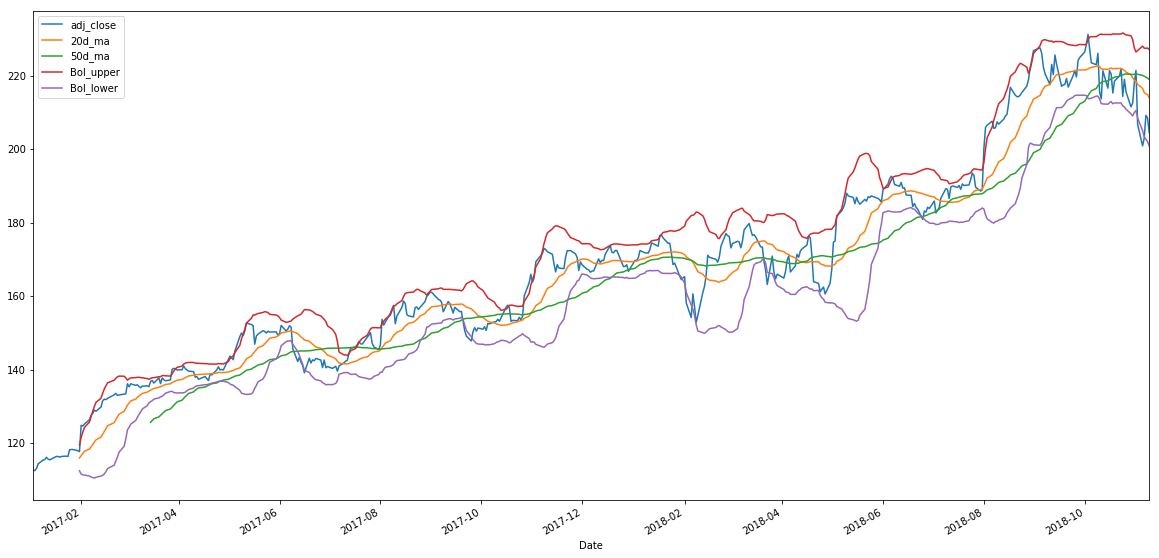

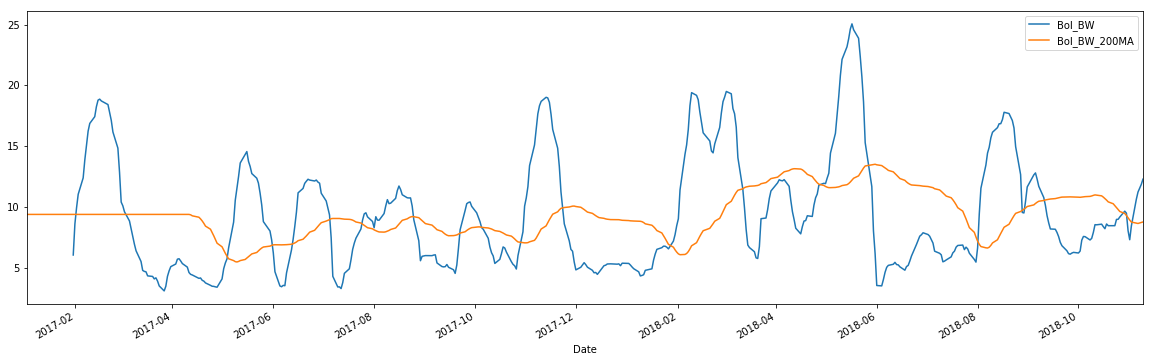

In [57]:
all_stock_df.plot(x=all_stock_df.index, y=['adj_close','20d_ma','50d_ma','Bol_upper','Bol_lower' ], figsize=(20,10))
all_stock_df.plot(x=all_stock_df.index, y=['Bol_BW','Bol_BW_200MA' ], figsize=(20,6))
plt.show()